In [11]:
import pandas as pd
file = 'Sagemont_Bammel.csv'

In [22]:
data = pd.read_csv(file, encoding="ISO-8859-1",index_col=0)

In [26]:
data.head()

,Sagemont,Bammel
Date,,
1/1/00 0:00,2.08,1.64
2/1/00 0:00,1.48,1.00
3/1/00 0:00,1.47,0.96
4/1/00 0:00,4.88,3.64
5/1/00 0:00,5.15,7.16


In [24]:
Bammel_data = data.drop(['Sagemont'], axis =1)
Bammel_data.head()

,Bammel
Date,
1/1/00 0:00,1.64
2/1/00 0:00,1.00
3/1/00 0:00,0.96
4/1/00 0:00,3.64
5/1/00 0:00,7.16


In [25]:
Bammel_data.head()

,Bammel
Date,
1/1/00 0:00,1.64
2/1/00 0:00,1.00
3/1/00 0:00,0.96
4/1/00 0:00,3.64
5/1/00 0:00,7.16


In [37]:
Bammel_data.index = pd.to_datetime(data.index)
Bammel_data.columns = ['Rainfall']
Bammel_data.head()

,Rainfall
Date,
2000-01-01,1.64
2000-02-01,1.00
2000-03-01,0.96
2000-04-01,3.64
2000-05-01,7.16


In [66]:
Sagemont_data = data.drop(['Bammel'], axis =1)
Sagemont_data.head()

,Sagemont
Date,
2000-01-01,2.08
2000-02-01,1.48
2000-03-01,1.47
2000-04-01,4.88
2000-05-01,5.15


In [85]:
Sagemont_data.index = pd.to_datetime(data.index)
Sagemont_data.columns = ['Rainfall']
Sagemont_data.head()

,Rainfall
Date,
2000-01-01,2.08
2000-02-01,1.48
2000-03-01,1.47
2000-04-01,4.88
2000-05-01,5.15


In [16]:
import matplotlib.pyplot as plt

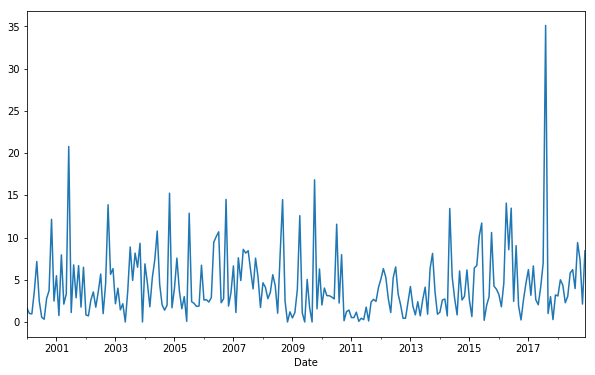

In [38]:
plt.figure(figsize=(10,6))
Bammel_data['Rainfall'].plot();
# plt.ylabel('Rainfall')

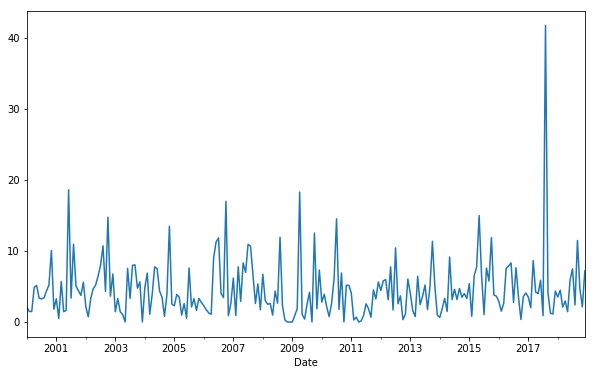

In [86]:
plt.figure(figsize=(10,6))
Sagemont_data['Rainfall'].plot();
# plt.ylabel('Rainfall')

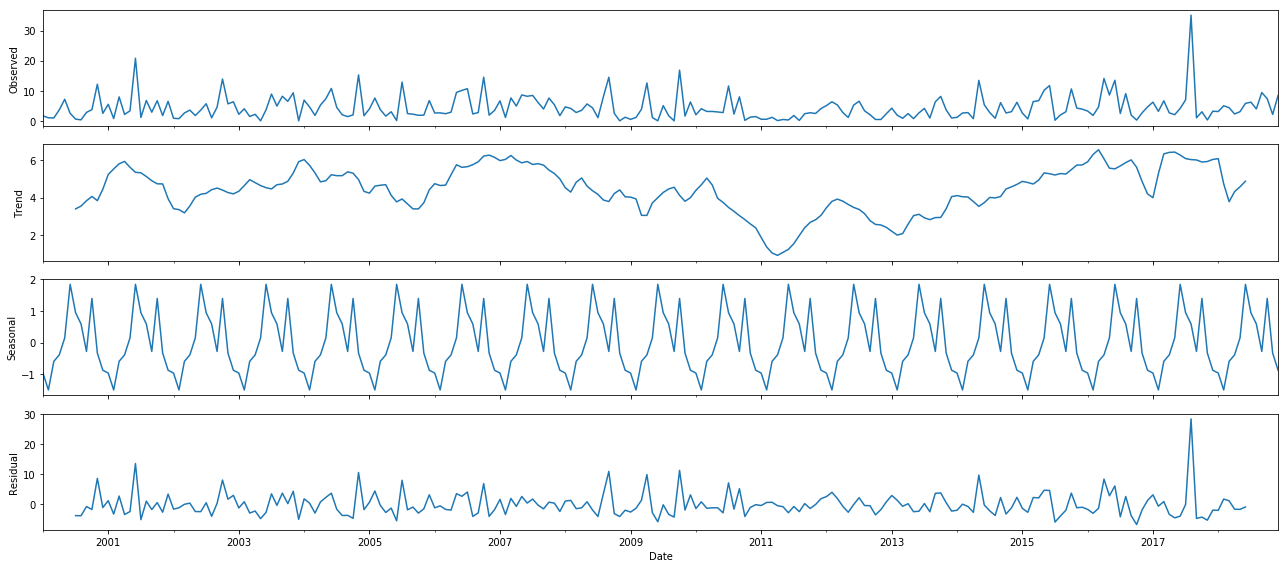

In [39]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(Bammel_data['Rainfall'], model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
import itertools
import statsmodels.api as sm


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [41]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Bammel_data['BRainfall'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [42]:
mod = sm.tsa.statespace.SARIMAX(Bammel_data['Rainfall'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0376      0.075     -0.503      0.615      -0.184       0.109
ma.L1         -1.0000     48.978     -0.020      0.984     -96.996      94.996
ar.S.L12      -0.5115      0.045    -11.280      0.000      -0.600      -0.423
sigma2        24.6315   1207.302      0.020      0.984   -2341.636    2390.899


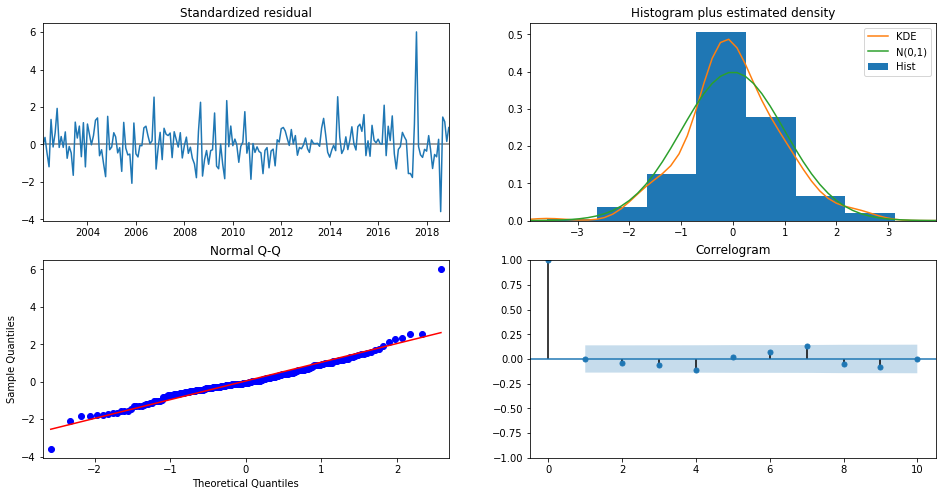

In [43]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

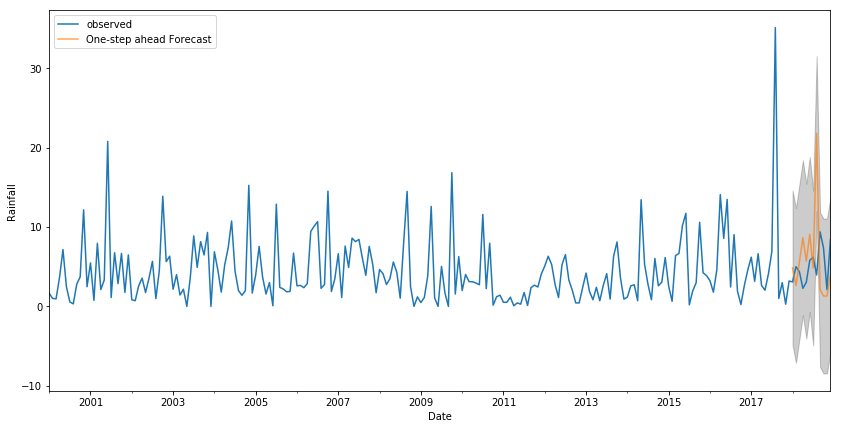

In [44]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = Bammel_data['Rainfall']['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()

plt.show()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = Bammel_data['Rainfall']['2018-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 41.59


In [46]:
import numpy as np
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 6.45


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


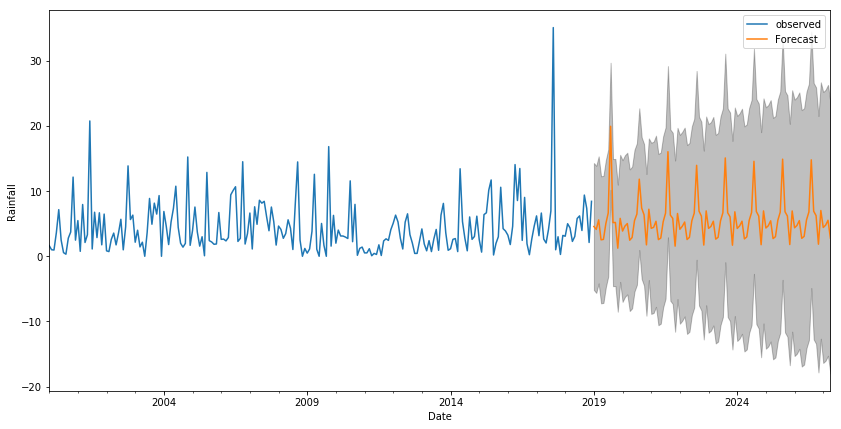

In [47]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = Bammel_data['Rainfall'].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')

plt.legend()
plt.show()

In [68]:
#Comparing Bammel and Sagemont

full_data = data.reset_index()
full_data.head()

,Date,Sagemont,Bammel
0,2000-01-01,2.08,1.64
1,2000-02-01,1.48,1.00
2,2000-03-01,1.47,0.96
3,2000-04-01,4.88,3.64
4,2000-05-01,5.15,7.16


In [70]:
Bammel_data1 = full_data.drop(['Sagemont'], axis =1)
Bammel_data1.head()

,Date,Bammel
0,2000-01-01,1.64
1,2000-02-01,1.00
2,2000-03-01,0.96
3,2000-04-01,3.64
4,2000-05-01,7.16


In [71]:
Sagemont_data1 = full_data.drop(['Bammel'], axis =1)
Sagemont_data1.head()

,Date,Sagemont
0,2000-01-01,2.08
1,2000-02-01,1.48
2,2000-03-01,1.47
3,2000-04-01,4.88
4,2000-05-01,5.15


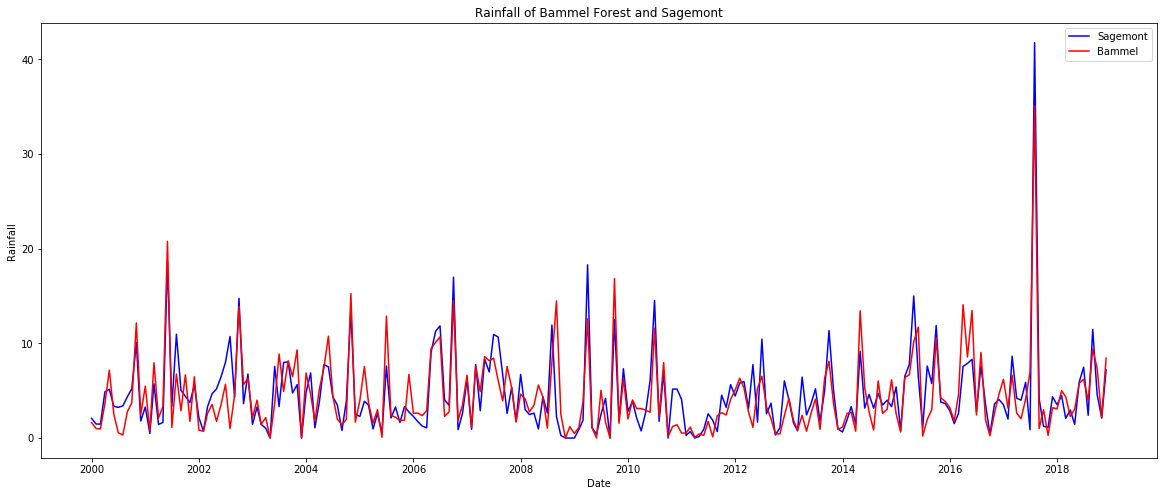

In [60]:
plt.figure(figsize=(20, 8))
plt.plot(full_data['Date'], full_data['Sagemont'], 'b-', label = 'Sagemont')
plt.plot(full_data['Date'], full_data['Bammel'], 'r-', label = 'Bammel')
plt.xlabel('Date'); plt.ylabel('Rainfall'); plt.title('Rainfall of Bammel Forest and Sagemont')
plt.legend();

In [65]:
first_date = full_data.ix[np.min(list(np.where(full_data['Bammel'] > full_data['Sagemont'])[0])), 'Date']

print("Bammel Forest Neighborhood first time with higher rainfall than Sagemont {}.".format(first_date.date()))

Bammel Forest Neighborhood first time with higher rainfall than Sagemont 2000-05-01.


/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [78]:
from fbprophet import Prophet

Bammel_data1 = Bammel_data1.rename(columns={'Date': 'ds', 'Bammel': 'y'})
Bammel_model = Prophet(interval_width=0.95)
Bammel_model.fit(Bammel_data1)

Sagemont_data1 = Sagemont_data1.rename(columns={'Date': 'ds', 'Sagemont': 'y'})
Sagemont_model = Prophet(interval_width=0.95)
Sagemont_model.fit(Sagemont_data1)

/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/margretsaniel/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
Bammel_forecast = Bammel_model.make_future_dataframe(periods=36, freq='MS')
Bammel_forecast = Bammel_model.predict(Bammel_forecast)

Sagemont_forecast = Sagemont_model.make_future_dataframe(periods=36, freq='MS')
Sagemont_forecast = Sagemont_model.predict(Sagemont_forecast)

<Figure size 1296x432 with 0 Axes>

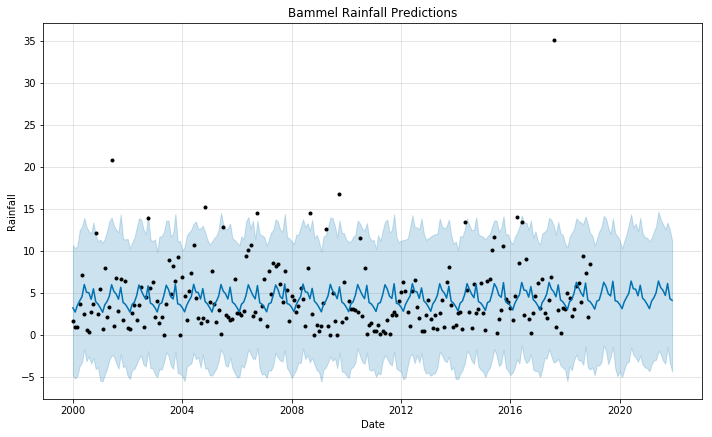

In [81]:
plt.figure(figsize=(18, 6))
Bammel_model.plot(Bammel_forecast, xlabel = 'Date', ylabel = 'Rainfall')
plt.title('Bammel Rainfall Predictions');

<Figure size 1296x432 with 0 Axes>

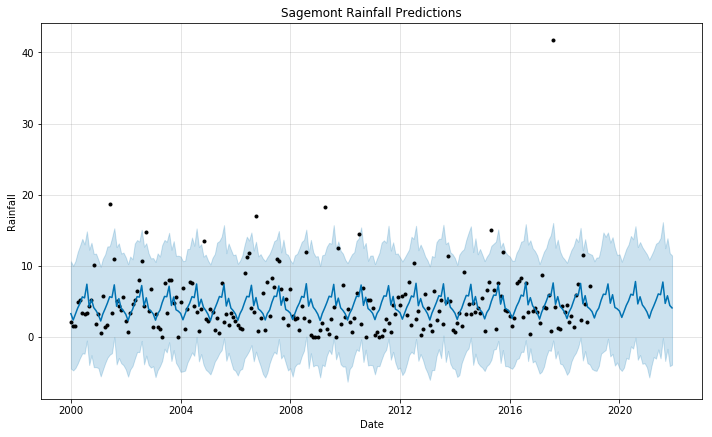

In [82]:
plt.figure(figsize=(18, 6))
Sagemont_model.plot(Sagemont_forecast, xlabel = 'Date', ylabel = 'Rainfall')
plt.title('Sagemont Rainfall Predictions');

In [83]:
Bammel_names = ['Bammel_%s' % column for column in Bammel_forecast.columns]
Sagemont_names = ['Sagemont_%s' % column for column in Sagemont_forecast.columns]

merge_Bammel_forecast = Bammel_forecast.copy()
merge_Sagemont_forecast = Sagemont_forecast.copy()

merge_Bammel_forecast.columns = Bammel_names
merge_Sagemont_forecast.columns = Sagemont_names

forecast = pd.merge(merge_Bammel_forecast, merge_Sagemont_forecast, how = 'inner', left_on = 'Bammel_ds', right_on = 'Sagemont_ds')

forecast = forecast.rename(columns={'Bammel_ds': 'Date'}).drop('Sagemont_ds', axis=1)
forecast.head()



,Date,Bammel_trend,Bammel_yhat_lower,Bammel_yhat_upper,Bammel_trend_lower,Bammel_trend_upper,Bammel_additive_terms,Bammel_additive_terms_lower,Bammel_additive_terms_upper,Bammel_yearly,...,Sagemont_additive_terms,Sagemont_additive_terms_lower,Sagemont_additive_terms_upper,Sagemont_yearly,Sagemont_yearly_lower,Sagemont_yearly_upper,Sagemont_multiplicative_terms,Sagemont_multiplicative_terms_lower,Sagemont_multiplicative_terms_upper,Sagemont_yhat
0,2000-01-01,4.253358,-4.821073,10.698326,4.253358,4.253358,-1.022193,-1.022193,-1.022193,-1.022193,...,-1.169434,-1.169434,-1.169434,-1.169434,-1.169434,-1.169434,0.0,0.0,0.0,3.262806
1,2000-02-01,4.253938,-5.183705,10.315796,4.253938,4.253938,-1.522563,-1.522563,-1.522563,-1.522563,...,-2.065403,-2.065403,-2.065403,-2.065403,-2.065403,-2.065403,0.0,0.0,0.0,2.367570
2,2000-03-01,4.254482,-4.841620,10.602203,4.254482,4.254482,-0.719268,-0.719268,-0.719268,-0.719268,...,-1.243416,-1.243416,-1.243416,-1.243416,-1.243416,-1.243416,0.0,0.0,0.0,3.190243
3,2000-04-01,4.255062,-3.701523,12.492660,4.255062,4.255062,-0.178155,-0.178155,-0.178155,-0.178155,...,-0.376653,-0.376653,-0.376653,-0.376653,-0.376653,-0.376653,0.0,0.0,0.0,4.057739
4,2000-05-01,4.255624,-3.250915,12.873648,4.255624,4.255624,0.288229,0.288229,0.288229,0.288229,...,0.261632,0.261632,0.261632,0.261632,0.261632,0.261632,0.0,0.0,0.0,4.696735


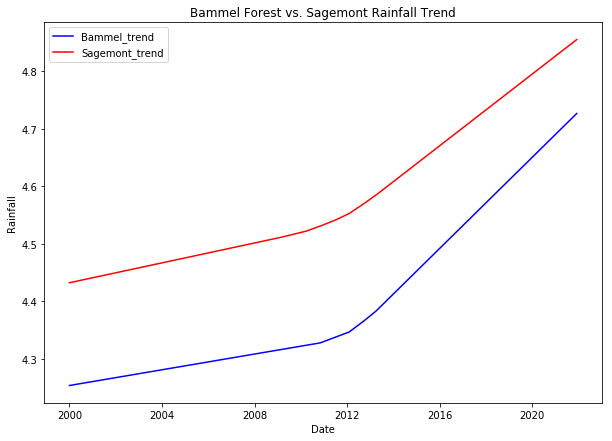

In [84]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Bammel_trend'], 'b-')
plt.plot(forecast['Date'], forecast['Sagemont_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Rainfall')
plt.title('Bammel Forest vs. Sagemont Rainfall Trend');

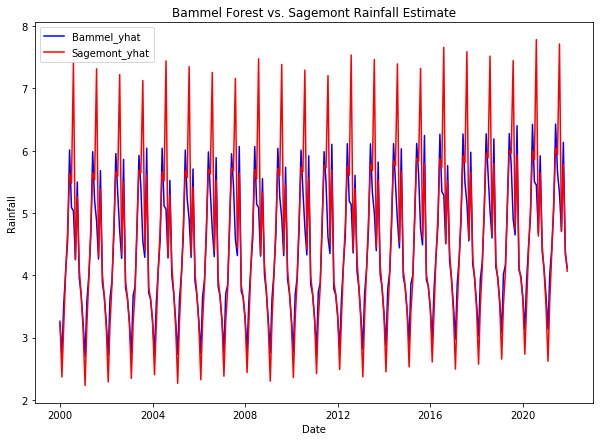

In [87]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Bammel_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['Sagemont_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Rainfall')
plt.title('Bammel Forest vs. Sagemont Rainfall Estimate');

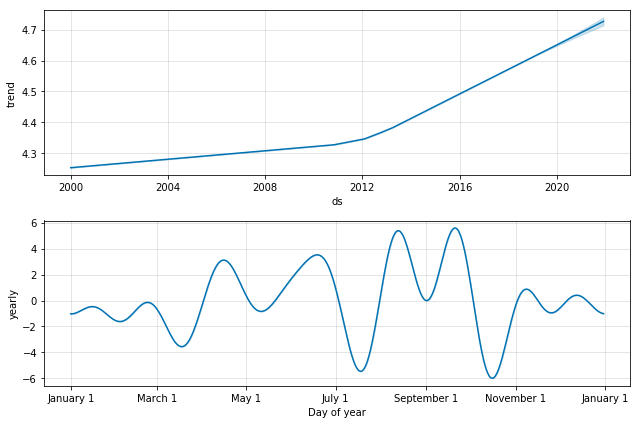

In [88]:
Bammel_model.plot_components(Bammel_forecast);

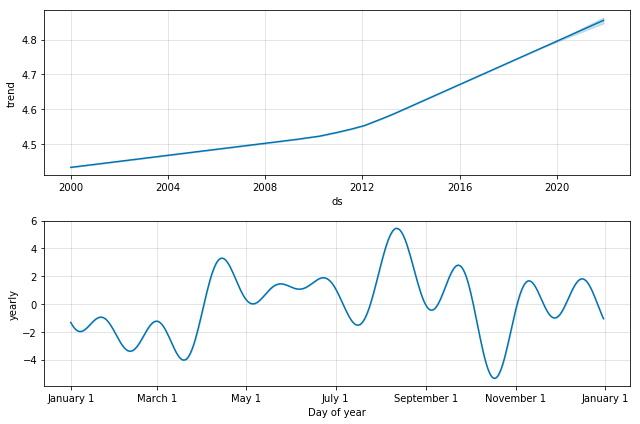

In [89]:
Sagemont_model.plot_components(Sagemont_forecast);